# CAP Theorem Applied

Any Distributed System involves a balance between:

* consistency
* availability
* partition tolerance.

You cannot have all three.

## Proof

* walk through: Gilbert & Lynch (Thanks to MWhittaker): https://mwhittaker.github.io/blog/an_illustrated_proof_of_the_cap_theorem/ ?

* ok, so pick any two... which two?

* Real usage of CAP theoream involves looking at what is pragmatic in real-life cases.

## What is a File System?

* an ordered list of writes applied to storage.

## What is a Database?

* an ordered list of writes applied to storage.

## When Distributed...

* User expectation is coherence.
* Coherence is the same thing as shared state.


## What is a File?

* an ordered list of bytes, with an id (path.)

## What is an Object (in object storage context)

* an ordered list of bytes, with an id (opaque hash)

Databases and File Systems are just really large files.


In [110]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Polygon, Arrow, FancyArrow

def three_circles(ax, x, y, box_bg, arrow1):
    patches = [
        Circle( (x,y), 0.3, fc=box_bg),
        Circle( (x+2,y), 0.3, fc=box_bg),
        Circle( (x+1, y-1), 0.3, fc=box_bg),
        FancyArrow( x+0.4, y, 1.2, 0, fc=arrow1, width=0.05, head_width=0.05, head_length=0 ),
        FancyArrow( x+0.25, y-0.3, 0.4, -0.4, fc=arrow1, width=0.05, head_width=0.05, head_length=0),
        FancyArrow( x+1.7, y-0.3, -0.4, -0.4, fc=arrow1, width=0.05, head_width=0.05, head_length=0) 
    ]
    
    for p in patches:
        ax.add_patch(p)
    plt.text(x-0.15,y+0.4, 'G1', fontsize=20)
    plt.text(x+1.85,y+0.4, 'G2', fontsize=20)
    plt.text(x+0.70,y-1.6, 'Client', fontsize=20)
def create_base(box_bg = '#CCCCCC',
                arrow1 = '#88CCFF',
                arrow2 = '#88FF88',
                supervised=True):
    
    fig = plt.figure(figsize=(10, 4.2), facecolor='w')
    ax = plt.axes((0, 0, 1, 1),
                 xticks=[], yticks=[], frameon=False)
    ax.set_xlim(0, 9)
    ax.set_ylim(0, 6)

    x=3
    y=3
    three_circles(ax, x,y,box_bg,arrow1)
    

Assuming a file system can do 100000 IOPS
distance between data centres=600, speed of light=300000 km/s,  time to travel (1way)=0.002 sec. 


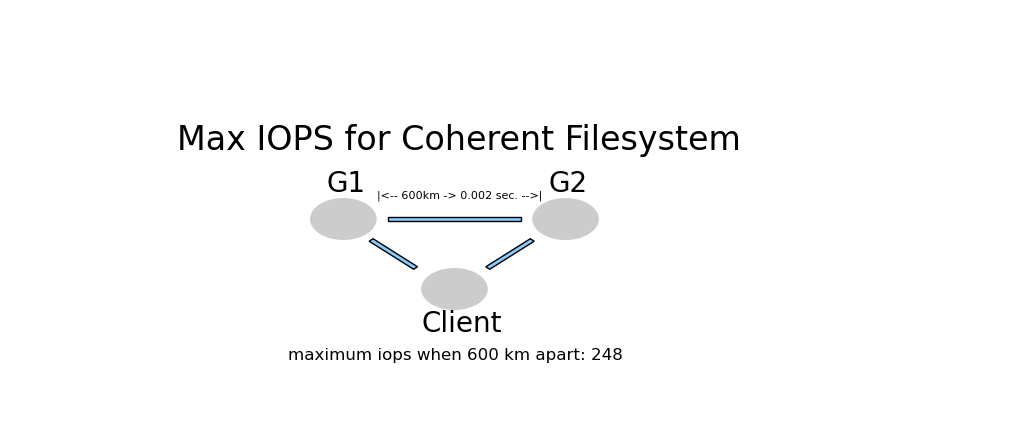

In [113]:
# Proof of IOPS ceiling
iops=100000
time_for_1_iop=1/iops
distance=600
c=300000
tprop=distance/c
max_iops=1/(2*(time_for_1_iop+tprop))

print( f"Assuming a file system can do {iops} IOPS")
print( f"distance between data centres={distance}, speed of light={c} km/s,  time to travel (1way)={tprop} sec. " )

create_base()
plt.text(1.5, 4, 'Max IOPS for Coherent Filesystem',fontsize=24)
plt.text(3.3, 3.3, '|<-- 600km -> 0.002 sec. -->|', fontsize=8)
plt.text(2.5, 1.0, f"maximum iops when {distance} km apart: {int(max_iops)}", fontsize=12)


plt.show()

## Consistency

* _any read operation that begins after a write operation completes must return that value, or the result of a later write operation_ -- Gilbert & Lynch

* Consistency means co-ordinating the state of two separated servers

* need time to send the update from one server to the other, and for the other to do the operation, and send back confirmation.

## 600km -> max 250 IOPS

* if you have two processes separated by, say 600 km (distance between Barrie and Montreal) then the maximum iops with a 10000 IOPS file system that you can achieve are 238 IOPS. if a file system is something with a synchronous state.

* Do you really want Consistency?

* Consistency == Global State == Synchronization == Performance Killer (Amdahl's Law)

* Are we a bank?

### Consistency is Incompatible with Distributed Performance.


## Almost-Coherent File System or DB Performance

* a synchronized file system is going to have ordered operations, it is going to be a 1:1 connection with shared state.
* write behind cache ... the write will get to the other side eventually, but G1 and G2 will be out of synch for a while 
* groups writes (instead of many small transactions, send fewer large ones, less overhead.) 
* usually a "journal" to sync between sides.
* in the meantime, readers on the wrong side get the _wrong_ data.  
* sometimes you establish an upper bound (if you hit it, you hang so that it doesn't get too out of sync.)
* synchronization will be a constant fight.

## Non-Shared Approaches.

* transfer files or objects, rather than synchronizing file systems.
* any number of transfers can occur in parallel.
* the file systems:
  * are not the same, they just contain the same files, eventually.
  * are not synchronized at any point, they receive a sum of changes that add up to the same stored state.
* lag can occur, but can run an unlimited number of processes to do transfers, none limited by propagation delay. Transfers occur in parallel to the degree desired.
* Because the transfers are independent, no fundamental performance limit, beyond the perfomance of hardware on each end, and the pipe between.



## Examples of Non-Shared Approaches

### Object Stores

* An object store is a self-contained item that can be distributed.
* Every object is equivalent to a db or a file system. 
* with many objects, state is distributed among subsets of nodes, not global.
* distribution of objects (with lag) is much easier to achieve than a coherent view.


### Sarracenia: File Systems Flying in Formation

* transfers files between file systems without synchronizing.
* Every file is equivalent to a db or a file system.
* no locking.
* generalized buffering and parallelism of transfer at scale.
* file systems at all nodes are totally independent, limited only by local hardware on each node.  
* transfers limited by bandwidth, not latency.



## Examples

* cloud vendors talk about "availability zones" there is no HA or synch across availabilty zones, they talk about times like 15 minutes, to do periodic synching. Object syncing takes time (and money.)
* 2006, HP DC Consolidation project established 200 miles as the longest distance between Data Centres. So that would give them 500 IOPS or so on a synchronous store.

## Availability

* _every request received by a non-failing node in the system must result in a response_

* so you have a pool of nodes to provide a service.  





In [ ]:
### Quorum / Voting

#### communications volume



In [ ]:
# See distributed co-ordination algorithms for details of each one.

# How many messages are moving around to pick a master.

# number of nodes in the group of servers
G=10
# each 
quorum = {}
# single Server case (no cluster) - request and response, that's it.
quorum["SingleServer"] = 0

#Primary/Backup - each backup that gets a request asks the master.
quorum["Primary/Backup"]=( 1+(G-1/G
                             
                             ), 0 )

# used often in Blockchains... leaves open the idea of a QuorumSize
quorum["QuorumConsensus"]=0

# Paxos -- the grandaddy.... 
# has a broadcast, those don't work outside LAN so counting it as G-1 messages
# BroadcastPropose - G messages ... one node decides to have a vote,
#  the rest of the nodes respond with their votes.
#  The maximum value is then broadcast...
# BroadcastPromise - G messages...
# BroadcastAccept  - G
# BroadcastLearn   - G

quorum["Paxos"]=( 1+(G-1/G), 4*G )



quorum["Raft"]=( 1+G/2, 4*G )


### If You Insist on Consistency
* At best, you need a quorum system.
* quorum represents a consensus among the existing nodes about the current state.
* usually means voting for primaries (at best, sharded masters) and triggering a pause to vote for a new primary whenever it goes down.
* The system as a whole, cannot respond to queries while voting is in progress, and so is unavailable.
* but at least it is up after the vote is done, in spite of the formerly primary node dying.

### Or...

* incoming requests are routed to the nodes that remain up. They provide the data they have.
* you don't need a master. nodes receive updates, and tell the others, changes propagate through the cluster.
* no voting, no loss of availability.

## Partition (Tolerance)

* _the network will be allowed to lose arbitrarily many messages sent from one node to another_

### If you want consistency, you end up with a primary+backup(s).
  * as long as the backups can reach the primary, all can answer read requests.
  * when a write is received, the backup passes it to the primary.
  * when a backup loses access to the primary, for coherency, it must stop answering. It no longer knows.
  * A Manual intervention would be required to tell the backup, it is now the primary in order for availability to be restored, because there is no way to tell the difference between a primary failure and a network partition.

### Or...

* you have a pool of nodes, they don't know or care about other nodes, they provide the data they have.
* transactions are queued between nodes, and arrive eventually.

  

  
  

# Thanks!


Sources:

* https://mwhittaker.github.io/blog/an_illustrated_proof_of_the_cap_theorem/ (An Illustrated Proof of the CAP Theorem, referring to Gilbert & Lynch's paper which is a dead link. )
* https://en.wikipedia.org/wiki/Fallacies_of_distributed_computing
* https://www.youtube.com/watch?v=eWMgsk7mpFc&ab_channel=IBMTechnology
* https://eax360.com/distributed-coordination-algorithms/ - Distributed Coordination Algorithms
* https://raft.github.io/raft.pdf In search of an Understandable Consensus Algorithm (Extended Version) Diego Ongaro and John Ousterhout.





# Different viewpoints
* operations cares about A
* devs may prefer C not realizing that it is a tradeoff with A.
* P is a function of chossing A vs. C... 